## Análise Exploratória de Dados

#### 1 - Importando os dados

Link do Dataset: [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 39)

In [2]:
arquivo = 'https://raw.githubusercontent.com/ryanrodr/eda-jobs-in-data/main/dados/jobs_in_data.csv'
df = pd.read_csv(arquivo)

In [3]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

9355 linhas e 12 colunas


In [4]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### 2 - Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number) ou dados duplicados.

In [5]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.duplicated().sum()

4014

- Removendo dados duplicados e resetando o índice

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


- Removendo colunas que não vão ser utilizadas

In [9]:
df.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

- Convertendo o tipo de dado das colunas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         5341 non-null   int64 
 1   job_title         5341 non-null   object
 2   job_category      5341 non-null   object
 3   salary_in_usd     5341 non-null   int64 
 4   experience_level  5341 non-null   object
 5   employment_type   5341 non-null   object
 6   work_setting      5341 non-null   object
 7   company_size      5341 non-null   object
dtypes: int64(2), object(6)
memory usage: 375.5+ KB


- Identificando as colunas categóricas que contenham menos de 10 valores únicos e contenham o tipo de dado 'object'

In [11]:
limite = 10

colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite and df[col].dtype == 'object']

In [12]:
colunas_categoricas

['job_category',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_size']

- Alterando o tipo de dado para 'category'

In [13]:
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         5341 non-null   int64   
 1   job_title         5341 non-null   object  
 2   job_category      5341 non-null   category
 3   salary_in_usd     5341 non-null   int64   
 4   experience_level  5341 non-null   category
 5   employment_type   5341 non-null   category
 6   work_setting      5341 non-null   category
 7   company_size      5341 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 194.0+ KB


#### 3 - Introdução e primeiros passos do projeto

In [15]:
df.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


- Criando uma tabela da quantidade de vagas disponíveis por categoria

In [16]:
# Contando a frequência dos valores com value_counts()
frequencia = df['job_category'].value_counts()
# Contando a frequência e transformando em %
frequencia_relativa = df['job_category'].value_counts(normalize=True) * 100

tabela_categoria = pd.DataFrame({'Frequência': frequencia,
                                 'Frequência Relativa (%)': frequencia_relativa})
tabela_categoria['Frequência Acumulada'] = tabela_categoria['Frequência'].cumsum()

tabela_categoria['Frequência Relativa Acumulada (%)'] = (tabela_categoria['Frequência Acumulada'] / tabela_categoria['Frequência'].sum()) * 100

In [17]:
tabela_categoria.rename_axis('Categoria', inplace=True)
tabela_categoria.reset_index(inplace=True)

In [18]:
tabela_categoria

,Categoria,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,Data Science and Research,1655,30.986707,1655,30.986707
1,Data Engineering,1160,21.718779,2815,52.705486
2,Machine Learning and AI,917,17.169069,3732,69.874555
3,Data Analysis,809,15.146976,4541,85.021532
4,Leadership and Management,351,6.571803,4892,91.593335
5,BI and Visualization,188,3.519940,5080,95.113275
6,Data Architecture and Modeling,162,3.033140,5242,98.146415
7,Data Management and Strategy,49,0.917431,5291,99.063846
8,Data Quality and Operations,45,0.842539,5336,99.906385
9,Cloud and Database,5,0.093615,5341,100.000000


In [19]:
# Centralizando a visualização da tabela
tabela_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,Data Science and Research,1655,30.986707,1655,30.986707
1,Data Engineering,1160,21.718779,2815,52.705486
2,Machine Learning and AI,917,17.169069,3732,69.874555
3,Data Analysis,809,15.146976,4541,85.021532
4,Leadership and Management,351,6.571803,4892,91.593335
5,BI and Visualization,188,3.519940,5080,95.113275
6,Data Architecture and Modeling,162,3.033140,5242,98.146415
7,Data Management and Strategy,49,0.917431,5291,99.063846
8,Data Quality and Operations,45,0.842539,5336,99.906385
9,Cloud and Database,5,0.093615,5341,100.000000


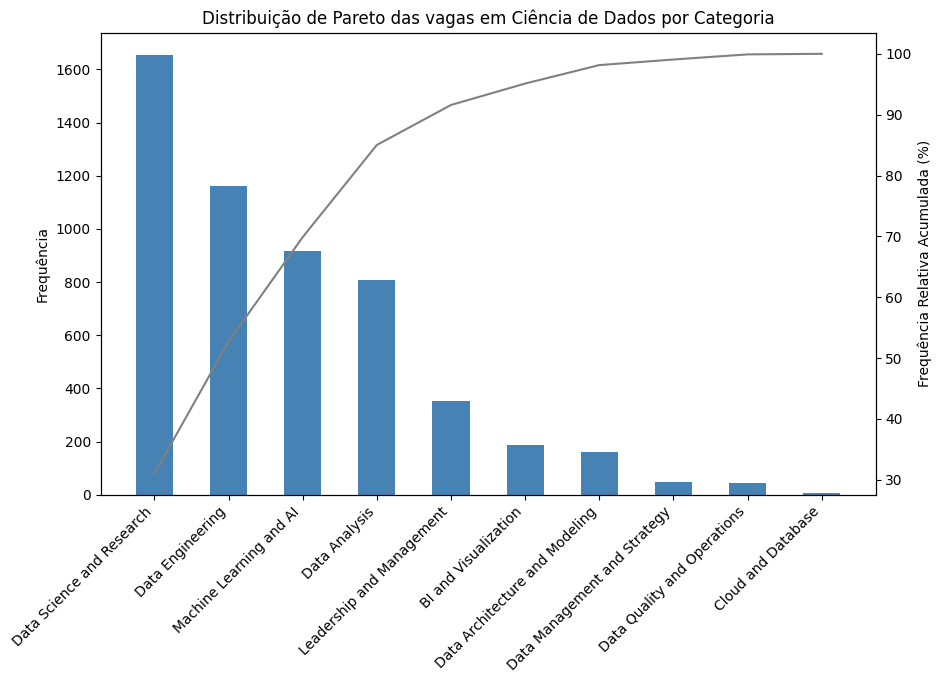

In [20]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras
ax1.bar(tabela_categoria['Categoria'],
        tabela_categoria['Frequência'],
        color='steelblue',
        width=0.50)

# Eixo y secundário para a linha
ax2 = ax1.twinx()

# Linha da frequência relativa acumulada
ax2.plot(tabela_categoria['Categoria'],
        tabela_categoria['Frequência Relativa Acumulada (%)'],
        color='grey',
        label='Frequência Relativa Acumulada (%)')

ax2.tick_params(axis='y')

# Rótulos e título
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência Relativa Acumulada (%)')
plt.title('Distribuição de Pareto das vagas em Ciência de Dados por Categoria')

# Definir os valores dos ticks do eixo X
ax1.set_xticks(range(len(tabela_categoria['Categoria'])))

# Definir os rótulos dos ticks do eixo X
ax1.set_xticklabels(tabela_categoria['Categoria'], rotation=45, ha='right')

# Exibir o gráfico
plt.show()

- Criando uma tabela de distribuição de frequências com categoria e ano

In [21]:
# crosstab para criar uma tabela cruzada com duas variáveis
tabela_dist = pd.crosstab(index= df['job_category'],
                          columns= df['work_year'],
                          aggfunc= 'count',
                          values= df['job_category'])

# Renomeando o eixo das linhas e das colunas da tabela
tabela_dist = tabela_dist.rename_axis('Categoria').rename_axis('Ano de Pesquisa', axis='columns')

# Adicionando uma coluna com os valores Totais de cada categoria
tabela_dist['Total'] = tabela_dist.sum(axis=1)

# Ordenando os dados com base na coluna Total
tabela_dist.sort_values(by='Total', ascending=False, inplace=True)

In [22]:
# Centralizando a visualização da tabela
tabela_dist.style.set_properties(**{'text-align': 'center'})

Ano de Pesquisa,2020,2021,2022,2023,Total
Categoria,,,,,
Data Science and Research,29,71,338,1217,1655
Data Engineering,17,44,286,813,1160
Machine Learning and AI,10,37,157,713,917
Data Analysis,15,28,185,581,809
Leadership and Management,0,9,71,271,351
BI and Visualization,0,0,8,180,188
Data Architecture and Modeling,0,5,30,127,162
Data Management and Strategy,0,1,10,38,49
Data Quality and Operations,0,0,8,37,45


- Criando uma visualização da quantidade de vagas por nível de experiência

In [23]:
# Contando a frequência dos valores com value_counts()
quantidade_exp = df['experience_level'].value_counts()

# Contando a frequência e transformando em %
percentual_exp = df['experience_level'].value_counts(normalize=True) * 100

tabela_exp = pd.DataFrame({'Quantidade': quantidade_exp,
                           'Porcentagem (%)': percentual_exp})

tabela_exp = tabela_exp.reset_index().rename(columns={'index': 'Experiência'})

In [24]:
# Centralizando a visualização da tabela
tabela_exp.style.set_properties(**{'text-align': 'center'})

,Experiência,Quantidade,Porcentagem (%)
0,Senior,3444,64.482307
1,Mid-level,1274,23.853211
2,Entry-level,400,7.489234
3,Executive,223,4.175248


#### 4 - Explorando visualizações com matplotlib e seaborn

- Criando uma visualização com subplots da biblioteca matplotlib.

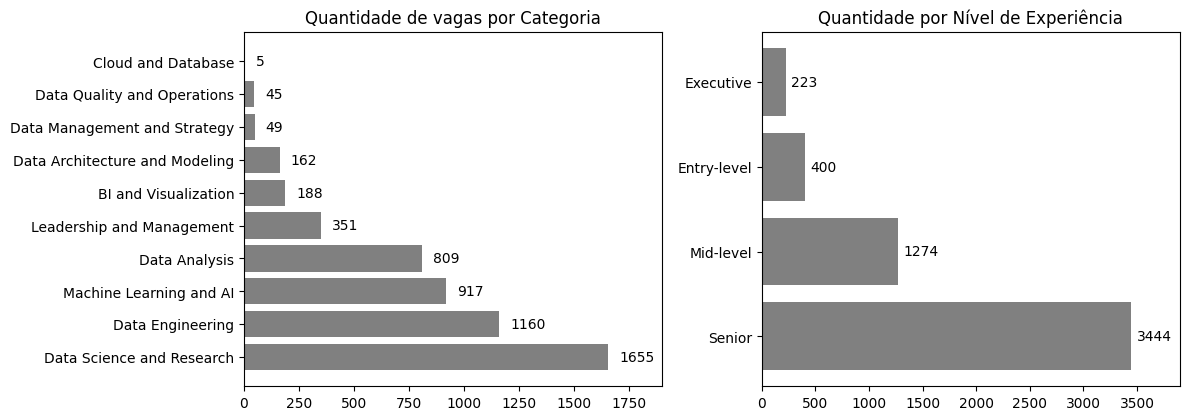

In [25]:
# Definindo o tamanho da imagem
plt.figure(figsize=(12, 8))

# Criando um gráfico de barras horizontais
plt.subplot(2, 2, 1)
plt.barh(tabela_categoria['Categoria'], tabela_categoria['Frequência'], color='grey')
for i, quantidade in enumerate(tabela_categoria['Frequência']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade de vagas por Categoria')
plt.xlim(0, 1900)

# Criando um gráfico de barras horizontais
plt.subplot(2, 2, 2)
plt.barh(tabela_exp['Experiência'], tabela_exp['Quantidade'], color='grey')
for i, quantidade in enumerate(tabela_exp['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade por Nível de Experiência')
plt.xlim(0, 3900)

# Ajustando o tamanho
plt.tight_layout()

- Criando uma tabela de distribuição de frequências com categoria e nível de experiência

In [26]:
# Tabela de distribuição cruzada usando crosstab
tabela_dist_exp = pd.crosstab(index=df['job_category'],
                 columns=df['experience_level'],
                 aggfunc='count',
                 values=df['job_category'])

tabela_dist_exp['Total'] = tabela_dist_exp.sum(axis=1)

tabela_dist_exp = tabela_dist_exp.sort_values(by='Total', ascending=False)

tabela_dist_exp = tabela_dist_exp.rename_axis('Categoria').rename_axis('Experiência', axis='columns')

In [27]:
# Visualizando a tabela em um HeatMap
tabela_dist_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior,Total
Categoria,,,,,
Data Science and Research,140,67,369,1079,1655
Data Engineering,55,75,296,734,1160
Machine Learning and AI,64,13,201,639,917
Data Analysis,111,16,241,441,809
Leadership and Management,10,46,72,223,351
BI and Visualization,7,4,45,132,188
Data Architecture and Modeling,0,2,27,133,162
Data Management and Strategy,10,0,13,26,49
Data Quality and Operations,3,0,10,32,45


In [28]:
# Removendo a coluna Total para criar um HeatMap
tabela_dist_exp = tabela_dist_exp.drop(columns='Total', axis=1)

# Somando os totais das linhas para transformar em %
soma_linhas = tabela_dist_exp.sum(axis=1)
categoria_exp = (tabela_dist_exp.div(soma_linhas, axis=0) * 100)

- Visualizando a proporção em % das Categorias por Nível de Experiência com `style`

In [29]:
# Visualizando o DataFrame com um gradiente de cores
categoria_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior
Categoria,,,,
Data Science and Research,8.459215,4.048338,22.296073,65.196375
Data Engineering,4.741379,6.465517,25.517241,63.275862
Machine Learning and AI,6.979280,1.417666,21.919302,69.683751
Data Analysis,13.720643,1.977750,29.789864,54.511743
Leadership and Management,2.849003,13.105413,20.512821,63.532764
BI and Visualization,3.723404,2.127660,23.936170,70.212766
Data Architecture and Modeling,0.000000,1.234568,16.666667,82.098765
Data Management and Strategy,20.408163,0.000000,26.530612,53.061224
Data Quality and Operations,6.666667,0.000000,22.222222,71.111111


- Visualizando a proporção em % das Categorias por Nível de Experiência com `seaborn`

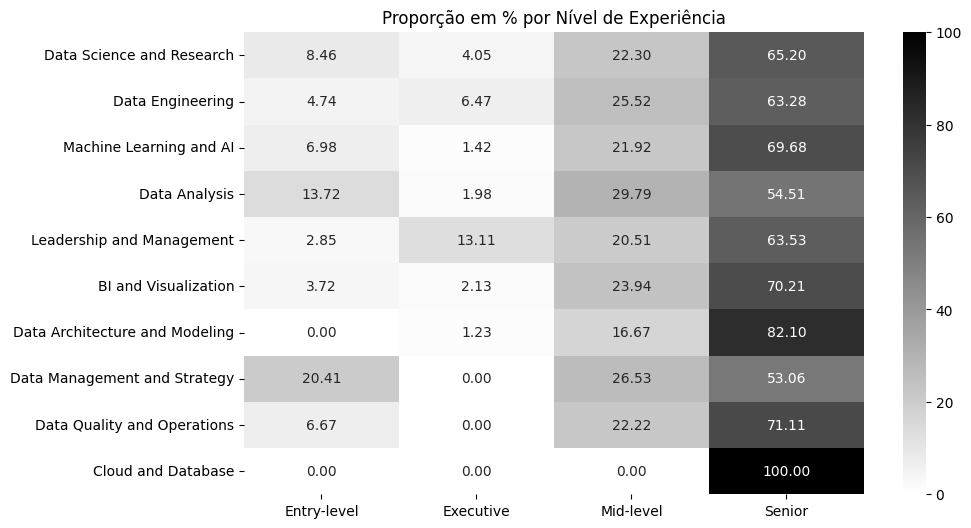

In [30]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))
plt.title('Proporção em % por Nível de Experiência')

# Visualizando o DataFrame em um Heatmap
ax = sns.heatmap(data=categoria_exp, annot=True, fmt='.2f', cmap='binary')
ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("");

In [31]:
tb_salario_categoria = df.groupby(['job_category'])\
                            .agg(min=pd.NamedAgg('salary_in_usd', 'min'),
                                max=pd.NamedAgg('salary_in_usd', 'max'),
                                mean=pd.NamedAgg('salary_in_usd', 'mean'))\
                            .reset_index()

tb_salario_categoria.dropna(axis=0, inplace=True)

tb_salario_categoria = tb_salario_categoria.rename(columns={'job_category': 'Categoria',
                                                            'min': 'Menor Salário',
                                                            'max': 'Maior Salário',
                                                            'mean': 'Média Salarial'})

- DataFrame Formato Largo (Wide Format)

In [32]:
# Centralizando a visualização da tabela
tb_salario_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Menor Salário,Maior Salário,Média Salarial
0,BI and Visualization,15000,259900,128377.734043
1,Cloud and Database,115000,190000,155000.000000
2,Data Analysis,15000,430967,106707.058096
3,Data Architecture and Modeling,52500,376080,157054.006173
4,Data Engineering,18000,385000,142967.543103
5,Data Management and Strategy,46400,250000,107655.836735
6,Data Quality and Operations,23753,289120,104586.022222
7,Data Science and Research,16000,450000,157131.039879
8,Leadership and Management,20000,430640,149020.108262
9,Machine Learning and AI,15000,423000,170453.221374


- DataFrame Formato Longo (Long Format)

In [33]:
tb_salario_categoria = tb_salario_categoria.melt(id_vars="Categoria", 
                                                value_vars=["Menor Salário", "Maior Salário", "Média Salarial"], 
                                                var_name="Tipo de Salário", 
                                                value_name="Salário")

In [34]:
tb_salario_categoria.head(3)

,Categoria,Tipo de Salário,Salário
0,BI and Visualization,Menor Salário,15000.0
1,Cloud and Database,Menor Salário,115000.0
2,Data Analysis,Menor Salário,15000.0


In [35]:
tb_salario_categoria.sort_values(by='Salário', ascending=True, inplace=True)

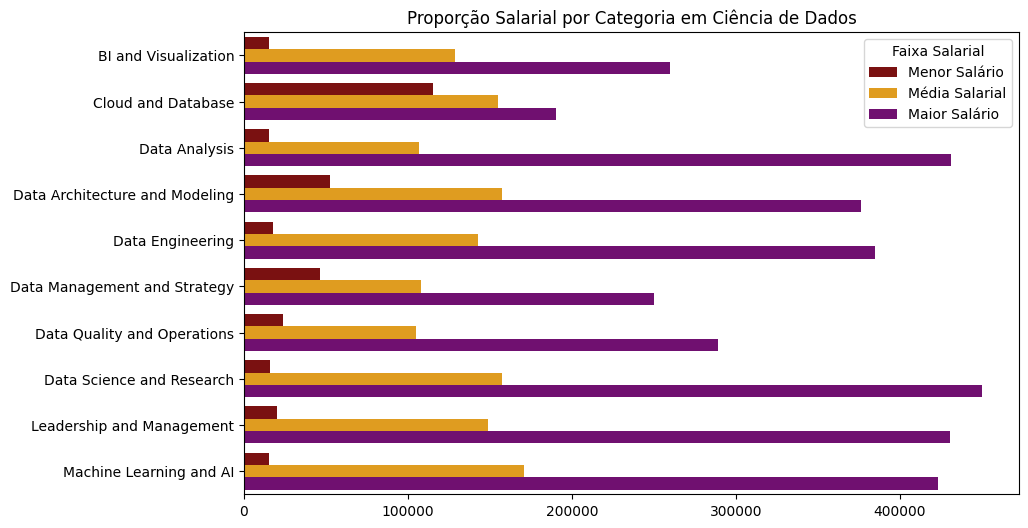

In [36]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))

# Visualizando o DataFrame com Seaborn
ax = sns.barplot(data=tb_salario_categoria, y="Categoria", x="Salário", hue="Tipo de Salário", 
                palette={"Menor Salário": "#8B0000", "Maior Salário": "purple", "Média Salarial": "orange"})

# Labels e título
plt.xlabel('Salário')
plt.ylabel('Categoria')
plt.title('Proporção Salarial por Categoria em Ciência de Dados')
plt.legend(title='Faixa Salarial')

ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("")
plt.show()